# DTSA5511

## Project Goal
Distinguishing between cats and dogs.

In [1]:
import zipfile
import os

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

In [2]:
files = os.listdir('extracted_folder')

In [3]:
animal_dir = os.path.join('extracted_folder', 'animal')

for sub_dir in ['cat', 'dog']:
    sub_dir_path = os.path.join(animal_dir, sub_dir)
    file_count = len(os.listdir(sub_dir_path))
    print(f"Number of files in '{sub_dir}' directory: {file_count}")

Number of files in 'cat' directory: 500
Number of files in 'dog' directory: 500


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

## EDA procedure

In [5]:
import shutil
import os

os.makedirs('extracted_folder/animal/train/cat', exist_ok=True)
os.makedirs('extracted_folder/animal/train/dog', exist_ok=True)
os.makedirs('extracted_folder/animal/validation/cat', exist_ok=True)
os.makedirs('extracted_folder/animal/validation/dog', exist_ok=True)

for sub_dir in ['cat', 'dog']:
    main_dir = os.path.join('extracted_folder/animal', sub_dir)
    train_sub_dir = os.path.join('extracted_folder/animal/train', sub_dir)
    val_sub_dir = os.path.join('extracted_folder/animal/validation', sub_dir)
    images = os.listdir(main_dir)
    num_train_images = 400
    num_val_images = 100
    
    for img in images[:num_train_images]:
        src = os.path.join(main_dir, img)
        dst = os.path.join(train_sub_dir, img)
        if not os.path.exists(dst):
            shutil.move(src, dst)
    
    for img in images[num_train_images:num_train_images + num_val_images]:
        src = os.path.join(main_dir, img)
        dst = os.path.join(val_sub_dir, img)
        if not os.path.exists(dst):
            shutil.move(src, dst)

for sub_dir in ['cat', 'dog']:
    print(f"Number of files in 'train/{sub_dir}' directory: {len(os.listdir(os.path.join('extracted_folder/animal/train', sub_dir)))}")
    print(f"Number of files in 'validation/{sub_dir}' directory: {len(os.listdir(os.path.join('extracted_folder/animal/validation', sub_dir)))}")


Number of files in 'train/cat' directory: 400
Number of files in 'validation/cat' directory: 100
Number of files in 'train/dog' directory: 400
Number of files in 'validation/dog' directory: 100


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'extracted_folder/animal/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'extracted_folder/animal/validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, epochs=10, steps_per_epoch=100)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.8814 - loss: 0.2766
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.9238 - loss: 0.1965
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step - accuracy: 0.9144 - loss: 0.2137
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9392 - loss: 0.1668
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.9485 - loss: 0.1303
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.9506 - loss: 0.1428
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.9532 - loss: 0.1248
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.9507 - loss: 0.1503
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9505 - loss: 0.1355
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9621 - loss: 0.1066


In [13]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - accuracy: 0.9736 - loss: 0.0525
Validation accuracy: 98.00%


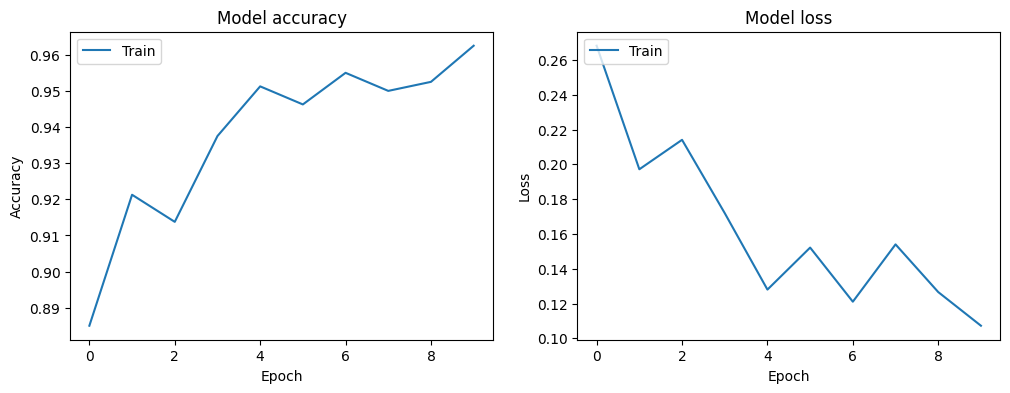

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


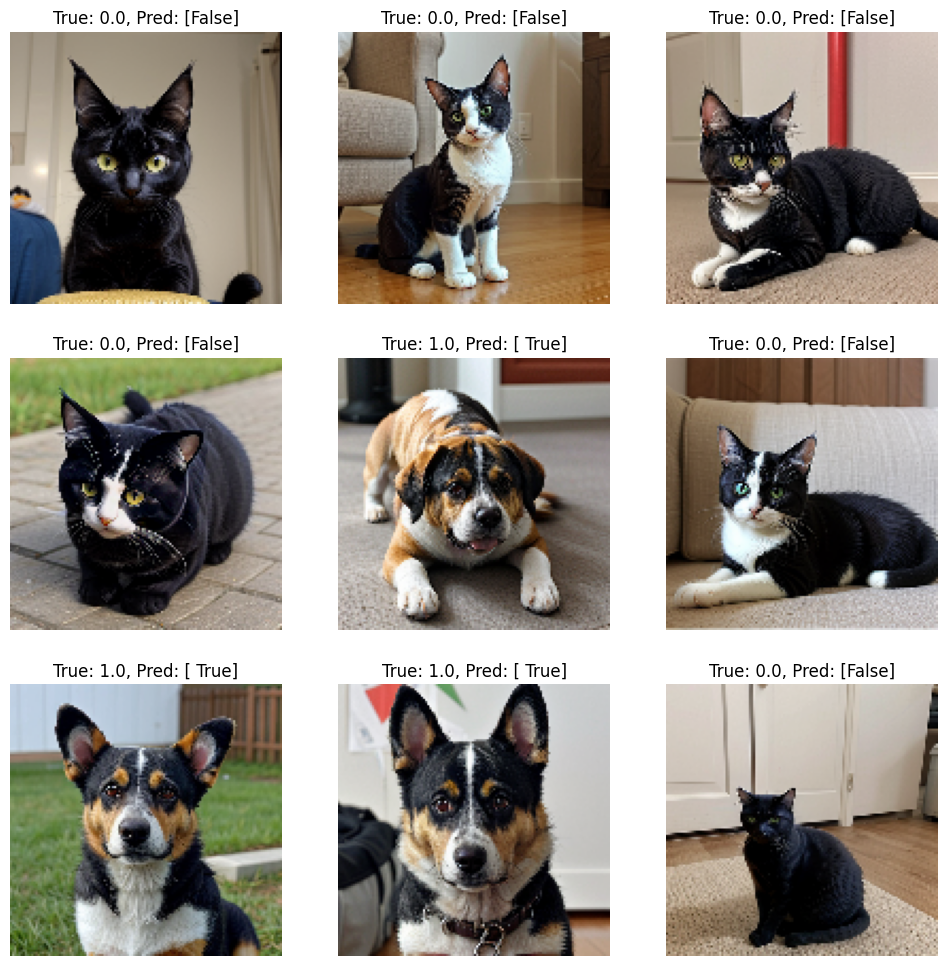

In [17]:
import numpy as np

images, labels = next(validation_generator)

predictions = model.predict(images)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {labels[i]}, Pred: {predictions[i] > 0.5}")
    plt.axis('off')
plt.show()

ぁぁ